In [1]:
import tclab
import numpy
import pandas

import tbcontrol
from tbcontrol import blocksim

import matplotlib.pyplot as plt
from latex_figure import plotfigure

import datetime

In [2]:
run_length = 2000

In [3]:
Names = ['CC P', 'CC PI', 'CC PID', 'IAE Setpoint PI', 'IAE Setpoint PID', 'IAE Distrurbance P', 'IAE Distrurbance PI', 'IAE Distrurbance PID']

In [8]:
data_frame = pandas.read_csv("Controller Testing Q2.csv", usecols = ['Time', 'T1', 'Q1', 'T2','Q2' ], index_col=['Time'])
data_frame = data_frame.loc[~data_frame.index.duplicated(keep='first')]
data_frame

,T1,Q1,T2,Q2
Time,,,,
0.0,47.33,37.33,37.34,0.0
1.0,47.33,88.45,37.34,0.0
2.0,47.33,88.45,37.67,0.0
3.0,47.01,88.45,37.02,0.0
4.0,47.01,88.45,37.34,0.0
...,...,...,...,...
15996.0,49.91,38.66,45.40,50.0
15997.0,49.91,38.66,45.40,50.0
15998.0,50.24,38.69,46.37,50.0


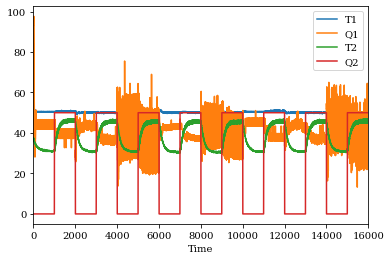

In [9]:
data_frame.plot()

In [13]:
aspect_ratio = 4 / 5
FULLSIZE = 5, 5 * aspect_ratio
HALFSIZE = 3, 3 * aspect_ratio

CC P 1
Length 2000
CC PI 2
Length 2001
CC PID 3
Length 2001
IAE Setpoint PI 4
Length 2001
IAE Setpoint PID 5
Length 2001
IAE Distrurbance P 6
Length 2001
IAE Distrurbance PI 7
Length 2001
IAE Distrurbance PID 8
Length 2001


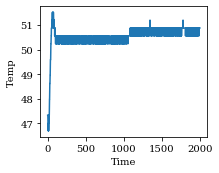

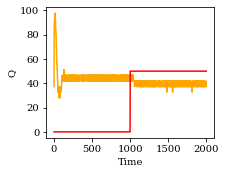

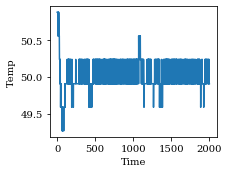

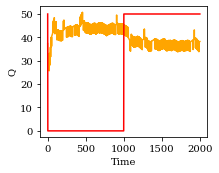

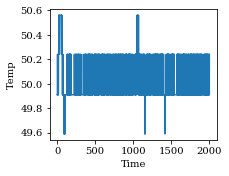

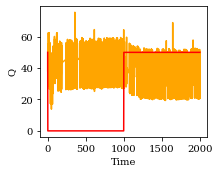

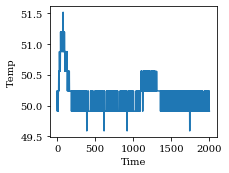

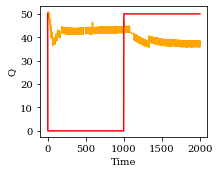

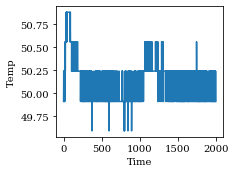

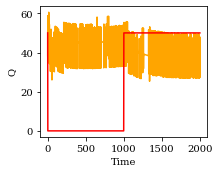

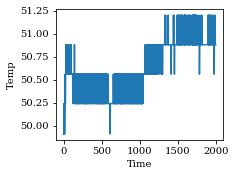

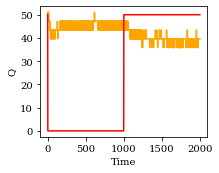

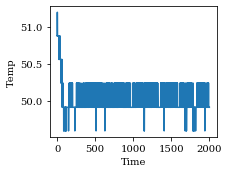

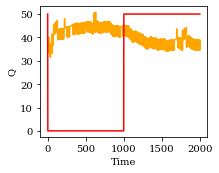

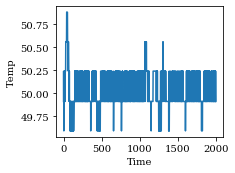

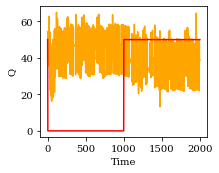

In [28]:
checker = 1
lower = 0
for index, row in data_frame.iterrows():
#     print (index/2000, checker)
    if index/2000 >= checker:
        upper = index
        print (Names[checker-1], checker)
        
        
        
        plt.figure(figsize = HALFSIZE)        
        plt.plot(data_frame[lower:upper].index - lower, data_frame[lower:upper]['T1'])
        plt.xlabel('Time')
        plt.ylabel('Temp')
        plt.savefig(r'PDFS\Disturbance\\' + Names[checker-1] + ' - Disturbance Temperature.pdf')
        
        plt.figure(figsize = HALFSIZE)    
        plt.plot(data_frame[lower:upper].index - lower, data_frame[lower:upper]['Q1'], 'orange')
        plt.plot(data_frame[lower:upper].index - lower, data_frame[lower:upper]['Q2'], 'r')
        plt.xlabel('Time')
        plt.ylabel('Q')
        plt.savefig(r'PDFS\Disturbance\\' + Names[checker-1] + ' - Disturbance Heater Fraction.pdf')
        
        print ('Length',len(data_frame[lower:upper]['T1']))
        
        checker+=1
        lower = index